<a href="https://colab.research.google.com/github/YonathanPandapotan/Tensorflow-NLP/blob/master/Latihan_Dicoding_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine Learning ini akan membaca datasets dan menentukan jenis aplikasi
# yang terdapat pada Windows Store berdasarkan nama aplikasi tersebut
# Langkah jalan aplikasi
"""
1. Baca datasets terlebih dahulu
2. Kemudian persiapkan library NLTK dan STOPWORDS
3. Berikutnya kita lakukan one-hot-encoding pada Category
4. Membagi dataframe menjadi value dan label
5. Mengganti setiap Stopwords yang ada pada text
6. Train-test-split
7. Buat Tokenizer untuk data training dan validasi
8. Buat model (sequential)
9. Membuat callback
10. Kemudian latih model kita
11. Terakhir tunjukkan plotting accuracy dan loss - training dan test
"""


In [ ]:
import pandas as pd
datasets = pd.read_csv('bbc-text.csv')
print(datasets.tail())
print('\n')
print("Size dari datasets ", len(datasets))

      category                                               text
1833  business  us gives foreign firms extra time foreign firm...
1834  politics  school sport  is back   says pm tony blair has...
1835     sport  henman overcomes rival rusedski tim henman sav...
1836     sport  saint-andre anger at absent stars sale sharks ...
1837  politics  watchdog probes e-mail deletions the informati...


Size dari datasets  1838


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
category = pd.get_dummies(datasets.category)
dataframe_baru = pd.concat([datasets, category], axis=1)
dataframe_baru = dataframe_baru.drop(columns='category')
dataframe_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
1833,us gives foreign firms extra time foreign firm...,1,0,0,0,0
1834,school sport is back says pm tony blair has...,0,0,1,0,0
1835,henman overcomes rival rusedski tim henman sav...,0,0,0,1,0
1836,saint-andre anger at absent stars sale sharks ...,0,0,0,1,0


In [ ]:
tulisan_text = dataframe_baru['text'].values
category = dataframe_baru[['business',
                          'entertainment',
                          'politics',
                          'sport',
                          'tech']].values
tulisan_text

array(['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in 

In [ ]:
import nltk

i=0

for value in tulisan_text:
  text = value
  for word in STOPWORDS:
    token = " " + word + " "
    text = text.replace(token, " ")
    text = text.replace("  ", " ")
  tulisan_text[i] = text
  i=i+1

In [ ]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(tulisan_text, category, test_size=0.2)


In [ ]:
print(len(text_latih))
print(len(text_test))

1470
368


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih, maxlen=200, padding='post', truncating='post')
padded_test = pad_sequences(sekuens_test, maxlen=200, padding='post', truncating='post')

In [ ]:
padded_test

array([[2418,   56, 1925, ...,   52, 1931, 2039],
       [2418, 1602, 1173, ...,    0,    0,    0],
       [ 669,  552, 4489, ...,    0,    0,    0],
       ...,
       [ 184, 2418, 1279, ..., 1036, 2418,   33],
       [3881, 1121,   11, ...,    0,    0,    0],
       [ 111,  160, 1263, ...,  469, 2384,  120]], dtype=int32)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#tf.keras.layers.Dense(128, activation='relu'),

In [ ]:
import datetime

class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_epoch_begin(self, epoch, logs=None):
      keys = list(logs.keys())
      print("Dimulai epoch ke-{}; pada waktu {}".format(epoch, datetime.datetime.now().time()))

  def on_epoch_end(self, epoch, logs=None):
      keys = list(logs.keys())
      print("Berakhir epoch ke-{}; pada waktu {}".format(epoch, datetime.datetime.now().time()))

  def on_train_batch_begin(self, batch, logs=None):
    print('\nTraining batch ke-{} dimulai pada {}'.format(batch, datetime.datetime.now().time()))

  def on_train_batch_end(self, batch, logs=None):
    print('Training batch ke-{} berakhir pada {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_begin(self, batch, logs=None):
    print('\nEvaluating batch ke-{} dimulai pada {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_end(self, batch, logs=None):
    print('\nEvaluating batch ke-{} berakhir pada {}'.format(batch, datetime.datetime.now().time()))

In [ ]:
num_epochs = 10
history = model.fit(padded_latih,
                    label_latih,
                    epochs=num_epochs,
                    callbacks=[MyCustomCallback()],
                    validation_data=(padded_test, label_test),
                    verbose=1)

Dimulai epoch ke-0; pada waktu 12:08:37.482862
Epoch 1/10

Training batch ke-0 dimulai pada 12:08:37.483615
Training batch ke-0 berakhir pada 12:08:41.032119
 1/46 [..............................] - ETA: 0s - loss: 1.6094 - accuracy: 0.2812
Training batch ke-1 dimulai pada 12:08:41.033624
Training batch ke-1 berakhir pada 12:08:41.232112
 2/46 [>.............................] - ETA: 4s - loss: 1.6067 - accuracy: 0.3438
Training batch ke-2 dimulai pada 12:08:41.233400
Training batch ke-2 berakhir pada 12:08:41.443994
 3/46 [>.............................] - ETA: 5s - loss: 1.6066 - accuracy: 0.3021
Training batch ke-3 dimulai pada 12:08:41.445621
Training batch ke-3 berakhir pada 12:08:41.664680
 4/46 [=>............................] - ETA: 6s - loss: 1.6061 - accuracy: 0.2969
Training batch ke-4 dimulai pada 12:08:41.666247
Training batch ke-4 berakhir pada 12:08:41.872825
 5/46 [==>...........................] - ETA: 6s - loss: 1.6051 - accuracy: 0.2812
Training batch ke-5 dimulai pad

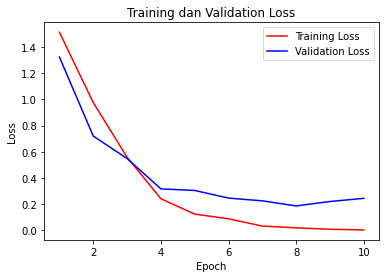

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Training dan Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

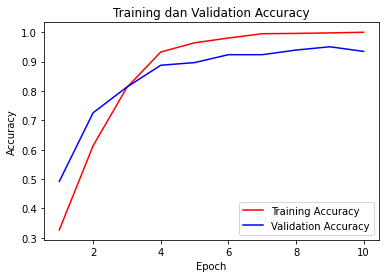

In [ ]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_accuracy, 'r-')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Training dan Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# buat ekspor model
# 1. Impor model terlebih dahulu
saving_path = ("/content/mymodel/") #path penyimpanan model
tf.saved_model.save(model, saving_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


In [ ]:
!pip install "tensorflow>=1.7.0"
!pip install tensorflowjs

     |████████████████████████████████| 71kB 2.9MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 
     |████████████████████████████████| 137.3MB 75kB/s 
     |████████████████████████████████| 256kB 46.1MB/s 
     |████████████████████████████████| 921kB 41.8MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32852 sha256=0f820de5ff7c2a17d8c7a77310da65e543d91962ccb2ec1905af4559e0fb9531
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.9.0
    Uninstalling tensorflow-hub-0.9.0:
      Successfully uninstalled tensorflow-hub-0.9.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

In [ ]:
!saved_model_cli show --dir /content/mymodel 


The given SavedModel contains the following tag-sets:
'serve'


In [ ]:
!tensorflowjs_converter \
    --input_format tf_saved_model \
    --output_node_names ‘MobilenetV1/Predictions/Reshape_1‘ \
    /content/mymodel/ \
    /content/modeltfjs

2020-09-03 12:05:14.478336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-09-03 12:05:14.482845: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200000000 Hz
2020-09-03 12:05:14.483126: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d34d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-09-03 12:05:14.483166: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-09-03 12:05:19.013323: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2020-09-03 12:05:19.01

In [ ]:

word2index = tokenizer.word_index

In [ ]:
import json
with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)